In [1]:
import sklearn
import pandas as pd

print(sklearn.__version__)

0.23.2


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
## 붓꽃 데이터 로딩
iris = load_iris()

## iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음.
iris_data = iris.data

## iris.target은 iris 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음.
iris_label = iris.target
print(f'iris target 값 : {iris_label}')
print(f'iris target 명 : {iris.target_names}')

## iris 데이터 세트를 자세히 보기위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


setosa : 0 , versicolor : 1 , virginica : 2

### 테스트 데이터와 학습 데이터로 분할
train_test_split()

X_train : 학습용 피처 데이터 세트

X_test : 테스트용 피처 데이터 세트

y_train : 학습용 레이블 데이터 세트

y_test : 테스트용 레이블 데이터 세트

### 학습 프로세스
1. **데이터 세트 분리** : 데이터를 학습 데이터와 테스트 데이터로 분리 (train_teat_split)
2. **모델 학습** : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습 (fit)
3. **예측 수행** : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측(붓꽃 종류) (predict)
4. **평가** : 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능을 평가 (accuracy_score)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                   test_size=0.2, random_state=9)
                                                ## iris_data = 데이터 리스트 (피처 데이터 세트)
                                                ## iris_label = 데이터 컬럼 (레이블 데이터 세트)
## random_state = 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수발생 값
## 값을 지정하지 않으면 수행할 때마다 다른 데이터 발생

In [19]:
X_test, X_test.shape, y_test, y_test.shape

(array([[7.7, 3. , 6.1, 2.3],
        [5.5, 2.6, 4.4, 1.2],
        [6.7, 3. , 5.2, 2.3],
        [6.5, 3. , 5.2, 2. ],
        [5. , 2. , 3.5, 1. ],
        [4.9, 3.6, 1.4, 0.1],
        [5. , 3.4, 1.6, 0.4],
        [4.6, 3.1, 1.5, 0.2],
        [6.6, 3. , 4.4, 1.4],
        [4.9, 3.1, 1.5, 0.1],
        [5. , 3. , 1.6, 0.2],
        [6.1, 2.8, 4.7, 1.2],
        [5.1, 2.5, 3. , 1.1],
        [5.6, 2.7, 4.2, 1.3],
        [5.1, 3.4, 1.5, 0.2],
        [5.5, 2.4, 3.7, 1. ],
        [5.4, 3.4, 1.5, 0.4],
        [5.7, 2.8, 4.5, 1.3],
        [5.8, 2.7, 5.1, 1.9],
        [4.6, 3.2, 1.4, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [5.2, 3.5, 1.5, 0.2],
        [6.4, 2.7, 5.3, 1.9],
        [5.4, 3.4, 1.7, 0.2],
        [7.7, 2.6, 6.9, 2.3],
        [5.5, 2.5, 4. , 1.3],
        [5. , 3.5, 1.6, 0.6],
        [6.7, 3.3, 5.7, 2.5],
        [4.4, 2.9, 1.4, 0.2],
        [6.4, 3.1, 5.5, 1.8]]),
 (30, 4),
 array([2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0,
        2, 0, 

In [20]:
# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=9)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=9)

In [21]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)
pred

array([2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 2])

In [3]:
from sklearn.metrics import accuracy_score

Score = accuracy_score(y_test, pred)
print(f'예측 정확도 : {round(Score, 4)}')

NameError: name 'y_test' is not defined

분류 알고리즘을 구현한 클래스 : Classifier

회귀 알고리즘을 구현한 클래스 : Regressor

Classifier + Regressor = Estimator : **지도학습**의 모든 알고리즘을 구현한 클래스

In [4]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


Bunck 클래스 : 파이썬 dict 자료형

In [5]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키 :', keys)

붓꽃 데이터 세트의 키 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
print(f'feature_names의 type : {type(iris_data.feature_names)}')
print(f'feature_names의 shape : {len(iris_data.feature_names)}')
print(iris_data.feature_names, '\n')

print(f'target_names의 type : {type(iris_data.target_names)}')
print(f'target_names의 shape : {len(iris_data.target_names)}')
print(iris_data.target_names, '\n')

print(f'data의 type : {type(iris_data.data)}')
print(f'data의 shape : {len(iris_data.data)}')
print(iris_data.data, '\n')

print(f'target의 type : {type(iris_data.target)}')
print(f'target의 shape : {len(iris_data.target)}')
print(iris_data.target, '\n')

feature_names의 type : <class 'list'>
feature_names의 shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

target_names의 type : <class 'numpy.ndarray'>
target_names의 shape : 3
['setosa' 'versicolor' 'virginica'] 

data의 type : <class 'numpy.ndarray'>
data의 shape : 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3

In [9]:
print(iris_data['DESCR'])   # description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target

dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)

accuracy_score(train_label, pred)

1.0

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, 
                                                   random_state=121)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [23]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print(round(accuracy_score(y_test, pred), 4), '%')

0.9556 %


### 교차 검증 (104p)
K 폴드 교차 검증

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
dct_cf = DecisionTreeClassifier(random_state=156)

features = iris.data
labels = iris.target

## 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print(f'붓꽃 데이터 세트 크기 : {features.shape[0]}')

붓꽃 데이터 세트 크기 : 150


In [27]:
for train_index, test_index in kfold.split(features):
    print(train_index)
    print(test_index)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [33]:
# 횟수 측정
n_iter = 0

# KFold 객체의 split()을 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    dct_cf.fit(X_train, y_train)
    pred = dct_cf.predict(X_test)
    
    n_iter += 1
    
    accuracy = round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    
    print('#{0} 검증 세트 인덱스 : {1}\n'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print(np.mean(cv_accuracy))

#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

0.9


### stratified Kfold

In [43]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [46]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)

for train_index, test_index in kfold.split(iris.data):
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(label_train.value_counts(), '\n')
    print(label_test.value_counts())
    print('----------------------------------------')

2    50
1    50
Name: label, dtype: int64 

0    50
Name: label, dtype: int64
----------------------------------------
2    50
0    50
Name: label, dtype: int64 

1    50
Name: label, dtype: int64
----------------------------------------
1    50
0    50
Name: label, dtype: int64 

2    50
Name: label, dtype: int64
----------------------------------------


학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었으므로 예측이 불가능함

In [50]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(iris.data, iris.target):
    print(iris_df['label'].iloc[train_index].value_counts())
    print(iris_df['label'].iloc[test_index].value_counts())
    print('---------------------------------')

2    34
1    33
0    33
Name: label, dtype: int64
1    17
0    17
2    16
Name: label, dtype: int64
---------------------------------
1    34
2    33
0    33
Name: label, dtype: int64
2    17
0    17
1    16
Name: label, dtype: int64
---------------------------------
0    34
2    33
1    33
Name: label, dtype: int64
2    17
1    17
0    16
Name: label, dtype: int64
---------------------------------


In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

cv_accuracy = []
dct_cf = DecisionTreeClassifier(random_state=156)
skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(iris.data, iris.target):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    
    dct_cf.fit(X_train, y_train)
    pred = dct_cf.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    
    print('# 교차 검증 정확도 : {0}, 학습 데이터 크기 : {1}, 검증 데이터 크기 : {2}'
         .format(accuracy, len(X_train), len(X_test)))
    print('검증 세트 인덱스 :', test_index, '\n')
    
print('교차 검증 정확도 평균 :', np.mean(cv_accuracy))

# 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115] 

# 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132] 

# 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149] 

교차 검증 정확도 평균 : 0.9666666666666667


일반적으로 분류에서의 교차 검증은 Stratified KFold로 분할.

회귀에서는 Stratified KFold를 지원하지 않음.

-> 회귀에서의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문

### cross_val_score()

KFold의 복잡한 과정을 한꺼번에 수행해주는 API

```python
cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
```

이 중 estimator, X, y, scoring, cv가 주요 parameter

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris.data
label = iris.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증별 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증별 정확도 : 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라메터 튜닝을 한 번에

```python
grid_parameters = {'max_depth': [1, 2, 3], 
                  'min_samples_split': [2, 3]}
```
-> 6회

In [58]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                   test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
## parameter = {하이퍼 파라미터의 명칭 : 하이퍼 파라메터의 값}
parameters = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

1. 학습 데이터 세트를 GridSearchCV 객체의 fit 메서드에 인자로 입력

2. 학습 데이터를 cv에 기술된 폴딩 세트로 분할

3. param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행

4. 결과를 cv_results_ 속성에 기록

5. cv_results_ 를 Pandas의 DataFrame으로 변환해 내용을 더 쉽게 관찰

In [59]:
import pandas as pd

# param_grid의 하이퍼 파라메터를 3개의 train, test set fold로 나누어 테스트 수행 결정
## refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


### 총 6개의 결과
params를 변경해가면서 각각의 결과를 출력했음

mean_test_score : cv의 폴딩 테스트 세트에 대해 총 수행한 평균 테스트 점수 = split_test_score의 평균

rank_test_score : 그 테스트 점수의 순위 (4,5 인덱스가 1위)

split_test_score : 이번 경우는 cv가 3인 경우, 즉 3개의 폴딩 세트에서 각각 테스트 성능 수치.

### 최적의 결과값
GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라메터 값과 그때의 평가 결과 값이 각각 `best_params_`, `best_score_` 속성에 기록됨

(= cv_result_의 rank_test_score가 1일 때의 값)

In [60]:
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.975


In [61]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습상태라, 별도 학습이 필요없음
pred = estimator.predict(X_test)

round(accuracy_score(y_test, pred), 4)

0.9667

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
dt_clf = DecisionTreeClassifier()

features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, random_state=121)

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

grid_dt_clf = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
grid_dt_clf.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dt_clf.cv_results_)
scores_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [9]:
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [10]:
grid_dt_clf.best_params_, grid_dt_clf.best_score_

({'max_depth': 3, 'min_samples_split': 2}, 0.975)

In [11]:
from sklearn.metrics import accuracy_score

estimator = grid_dt_clf.best_estimator_
pred = estimator.predict(X_test)

accuracy = round(accuracy_score(y_test, pred), 4)
print(accuracy)

0.9667


### 레이블 인코딩

In [14]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()와 transform으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환 값 :', labels)
print('인코딩 클래스 :', encoder.classes_)  # 알파벳 순대로 인코딩 번호 부여

인코딩 변환 값 : [0 1 4 5 3 3 2 2]
인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


#### 다시 디코딩 하려면

In [15]:
print('디코딩 원본 값 :', encoder.inverse_transform([5, 4, 2, 0, 1, 1, 3, 4]))

디코딩 원본 값 : ['컴퓨터' '전자레인지' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '전자레인지']


### 원 핫 인코더

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

# 출력
print('원-핫 인코딩 데이터')
print(oh_labels.toarray(), '\n')
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]] 

원-핫 인코딩 데이터 차원
(8, 6)


`인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']`

-> TV - 냉장고 - 전자레인지 - 컴퓨터 - 선풍기 - 선풍기 - 믹서 - 믹서

### pandas의 get_dummies() 를 이용한 원-핫 인코딩

In [20]:
df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링 : 표준화 (124p)

## $x_{i}\_new = \frac{x_{i}-mean(x)}{stdev(x)}$

In [21]:
from sklearn.datasets import load_iris

## 변환 전
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [22]:
from sklearn.preprocessing import StandardScaler

## 변환 후
# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값 :')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값 :
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 결과 : 모든 feature들의 평균 값이 0에 가깝고, 분산이 1에 가까움

### 피처 스케일링 : 정규화

## $x_{i}\_new = \frac{x_{i}-min(x)}{max(x)-min(x)}$

In [24]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('feature 들의 최댓값')
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 주의 사항

학습 데이터 세트와 테스트 데이터 세트에 fit()과 transform() 적용할 때 주의사항

-> 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 함.

In [31]:
from sklearn.preprocessing import MinMaxScaler

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
## Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체에 별도로 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit() 하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :', train_array.reshape(-1))
print('Scale 된 train_array 데이터 :', train_scaled.reshape(-1))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale 된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


### 테스트 데이터 스케일링

In [32]:
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터 :', test_array.reshape(-1))
print('Scale 된 test_array 데이터 :', test_scaled.reshape(-1))

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale 된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


### 여기서 fit을 다시 호출해 스케일링을 진행한다면?

In [30]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 5 -> 1 로 변환
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터 :', test_array.reshape(-1))
print('Scale 된 test_array 데이터 :', test_scaled.reshape(-1))

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale 된 test_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


---

### 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
titanic = pd.read_csv('C:/Users/user/seaborn-data/titanic_train_kaggle.csv')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)

In [12]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


In [13]:
titanic['Cabin'].str[0]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

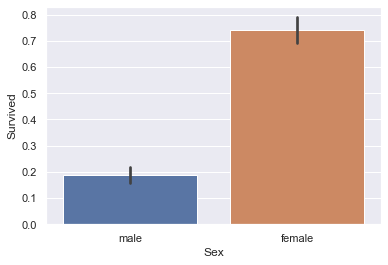

In [14]:
sns.set(rc={'figure.facecolor':'white'})
sns.barplot(x='Sex', y='Survived', data=titanic)

-> 남성과 여성이 살아남을 확률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

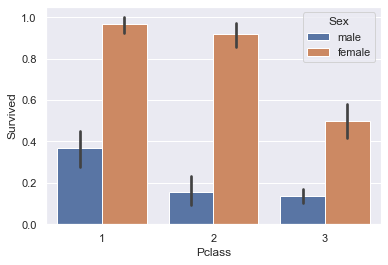

In [16]:
sns.set(rc={'figure.facecolor':'white'})
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)

Age에 카테고리 할당

```
0~5 : Baby, 6~12 : Child, 13~18 : Teen, 19~25 : Student, 
26~35 : Young Adult, 36~60 : Adult, Over 61 : Elderly, Error : Unknown
```

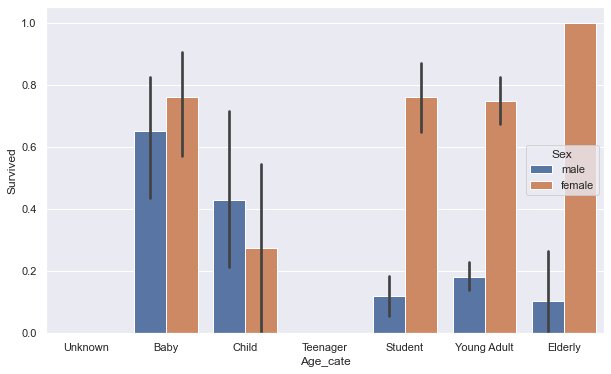

In [18]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cate = ''
    if age <= -1: cate = 'Unknown'
    elif age <= 5: cate = 'Baby'
    elif age <= 12: cate = 'Child'
    elif age <= 18: cate = 'Teen'
    elif age <= 25: cate = 'Student'
    elif age <= 35: cate = 'Young Adult'
    elif age <= 60: cate = 'Adult'
    else: cate = 'Elderly'
        
    return cate

plt.figure(figsize=(10,6), facecolor='white')

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 
               'Student', 'Young Adult', 'Elderly']

# lambda 함수
titanic['Age_cate'] = titanic['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cate', y='Survived', hue='Sex', data=titanic, order=group_names)

titanic.drop('Age_cate', axis=1, inplace=True)

### 레이블 인코딩

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
feature = ['Cabin', 'Sex', 'Embarked']

for feat in feature:
    encoder.fit(titanic[feat])
    titanic[feat] = encoder.transform(titanic[feat])
    
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings(action='ignore')

sel = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X = titanic[sel]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

dtree = DecisionTreeClassifier(random_state=11)
rforest = RandomForestClassifier(random_state=11)
logistic = LogisticRegression()

dtree.fit(X_train, y_train)
rforest.fit(X_train, y_train)
logistic.fit(X_train, y_train)

pred1 = dtree.predict(X_test)
pred2 = rforest.predict(X_test)
pred3 = logistic.predict(X_test)

accuracy1 = accuracy_score(y_test, pred1)
accuracy2 = accuracy_score(y_test, pred2)
accuracy3 = accuracy_score(y_test, pred3)

print('결정트리 : %.3f'%accuracy1)
print('랜덤 포레스트 : %.3f'%accuracy2)
print('로지스틱 회귀 : %.3f'%accuracy3)

결정트리 : 0.583
랜덤 포레스트 : 0.686
로지스틱 회귀 : 0.664


### KFold 적용

In [38]:
X.shape, y.shape

((891, 6), (891,))

In [45]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
scores = []

for iter_count, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, y_train = X.values[train_index], y.values[train_index]
    X_test, y_test = X.values[test_index], y.values[test_index]
    
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    scores.append(accuracy)
    
    print('교차 검증 {0} 정확도 : {1}'.format(iter_count, round(accuracy, 4)))
    
print('정확도 평균 : %.3f'%np.mean(scores))

교차 검증 0 정확도 : 0.5531
교차 검증 1 정확도 : 0.5393
교차 검증 2 정확도 : 0.6685
교차 검증 3 정확도 : 0.691
교차 검증 4 정확도 : 0.3596
정확도 평균 : 0.562


### cross_val_score 적용

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree, X.values, y.values, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1}'.format(iter_count, round(accuracy, 4)))
    
print(f'평균 정확도 : {np.mean(scores)}')

교차 검증 0 정확도 : 0.6313
교차 검증 1 정확도 : 0.5674
교차 검증 2 정확도 : 0.6236
교차 검증 3 정확도 : 0.7191
교차 검증 4 정확도 : 0.6798
평균 정확도 : 0.6442345113301111


### GridSearchCV 적용

- 5개의 폴드 세트 지정

- 하이퍼 파라미터 변경 : max_depth, min_samples_split, min_samples_leaf

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid = GridSearchCV(dtree, param_grid=parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

print('GridSearchCV 최적의 파라미터 :', grid.best_params_)
print('GridSearchCV 최고 정확도 :', grid.best_score_)
best_esti = grid.best_estimator_

# GridSearchCV의 최적 하이퍼 파라메터로 학습된 Estimator로 예측 및 평가 수행
pred = best_esti.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('테스트 세트에서의 결정 트리 정확도 :', accuracy)

GridSearchCV 최적의 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.6830985915492958
테스트 세트에서의 결정 트리 정확도 : 0.7865168539325843
